In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
import torch.nn.functional as F
from tqdm.auto import tqdm
import copy
import matplotlib.pyplot as plt
import gdown
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_auc_score

In [ ]:
from google.colab import files

# Create a file upload dialog
uploaded_files = files.upload()

# Print the names of the uploaded files
for file_name in uploaded_files.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=file_name, length=len(uploaded_files[file_name])))


Saving test_video.mp4 to test_video.mp4
User uploaded file "test_video.mp4" with length 485557 bytes


In [ ]:
file_name = 'test_video_altered.mp4'

In [ ]:
import shutil
import os
os.makedirs("test_video")
shutil.move(file_name ,"/content/test_video/"+file_name)

'/content/test_video/test_video_altered.mp4'

In [ ]:
!pip3 install MTCNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.3 MB/s eta 0:00:00


In [ ]:
import cv2
import os
from tqdm import tqdm
from mtcnn.mtcnn import MTCNN
from PIL import Image
import numpy as np
import time

In [ ]:
def video_to_frames(video_path, output_dir, subsample_rate=1):
    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Get the video's frame rate
    frame_rate = int(video_capture.get(cv2.CAP_PROP_FPS))
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    frame_count = 0
    while video_capture.isOpened():
        ret, frame = video_capture.read()
        if not ret:
            break  # Break the loop if no more frames are available

        # Save frames at the specified subsample rate
        if frame_count % (frame_rate // subsample_rate) == 0:
            output_frame_path = os.path.join(output_dir, f"{os.path.basename(video_path)}_frame_{frame_count}.jpg")
            cv2.imwrite(output_frame_path, frame)

        frame_count += 1

    video_capture.release()
    print(f"{frame_count // (frame_rate // subsample_rate)} frames extracted from {os.path.basename(video_path)}")

In [ ]:
# Define the path to the directory containing the altered videos
video_dir = "/content/test_video"

# Define the directory where you want to save the frames
output_dir = "/content/test_video_frames"

# Define the subsample rate (frames per second)
subsample_rate = 1

# Get list of all video files in the directory
video_files = [f for f in os.listdir(video_dir) if f.endswith(".mp4")]
video_paths = [os.path.join(video_dir, file) for file in video_files]

# Extract frames from each video
for video_path in tqdm(video_paths):
    video_to_frames(video_path, output_dir, subsample_rate)

100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

34 frames extracted from test_video_altered.mp4


In [ ]:
def crop_and_resize(input_dir, output_dir, size=(224, 224)):
    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Initialize the MTCNN detector
    detector = MTCNN()

    # Loop through each image in the input directory
    for img_file in tqdm(os.listdir(input_dir)):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            img_path = os.path.join(input_dir, img_file)
            img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
            img = Image.fromarray(img)

            # Detect faces in the image
            faces = detector.detect_faces(np.array(img))

            # If a face is detected, crop the face, resize it, and save it
            if faces:
                x, y, width, height = faces[0]['box']
                face = img.crop((x, y, x + width, y + height))
                face = face.resize(size)
                face.save(os.path.join(output_dir, img_file))



In [ ]:
input_dir = '/content/test_video_frames'
output_dir = '/content/test_video_frames_cropped/all_images'

crop_and_resize(input_dir, output_dir)

  0%|          | 0/35 [00:00<?, ?it/s]

1/1 [==============================] - 0s 281ms/step


  3%|▎         | 1/35 [00:10<05:45, 10.16s/it]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 2/35 [00:11<02:34,  4.69s/it]

1/1 [==============================] - 0s 144ms/step


  9%|▊         | 3/35 [00:12<01:36,  3.02s/it]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 4/35 [00:12<01:07,  2.18s/it]

1/1 [==============================] - 0s 132ms/step


 14%|█▍        | 5/35 [00:13<00:52,  1.75s/it]

1/1 [==============================] - 0s 123ms/step


 17%|█▋        | 6/35 [00:14<00:43,  1.48s/it]

1/1 [==============================] - 0s 123ms/step


 20%|██        | 7/35 [00:15<00:37,  1.32s/it]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 8/35 [00:17<00:34,  1.28s/it]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 9/35 [00:18<00:34,  1.33s/it]

1/1 [==============================] - 0s 150ms/step


 29%|██▊       | 10/35 [00:20<00:34,  1.39s/it]

1/1 [==============================] - 0s 18ms/step


 31%|███▏      | 11/35 [00:20<00:29,  1.24s/it]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 12/35 [00:21<00:25,  1.11s/it]

1/1 [==============================] - 0s 144ms/step


 37%|███▋      | 13/35 [00:22<00:23,  1.06s/it]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 14/35 [00:23<00:20,  1.02it/s]

1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 15/35 [00:24<00:19,  1.04it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 16/35 [00:25<00:17,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


 49%|████▊     | 17/35 [00:26<00:16,  1.12it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 18/35 [00:26<00:14,  1.15it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 19/35 [00:27<00:13,  1.15it/s]

1/1 [==============================] - 0s 145ms/step


 57%|█████▋    | 20/35 [00:28<00:13,  1.09it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 21/35 [00:29<00:12,  1.13it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 22/35 [00:30<00:12,  1.04it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 23/35 [00:32<00:13,  1.09s/it]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 24/35 [00:33<00:12,  1.11s/it]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 25/35 [00:34<00:10,  1.09s/it]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 26/35 [00:35<00:09,  1.01s/it]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 27/35 [00:35<00:07,  1.05it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 28/35 [00:36<00:06,  1.10it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████▎ | 29/35 [00:37<00:05,  1.15it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 30/35 [00:38<00:04,  1.16it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 31/35 [00:39<00:03,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 32/35 [00:40<00:02,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 33/35 [00:41<00:01,  1.11it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 34/35 [00:41<00:00,  1.14it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 35/35 [00:42<00:00,  1.22s/it]


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize to the input size of the model
    transforms.ToTensor(),
])

test_dataset = datasets.ImageFolder(root='/content/test_video_frames_cropped', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def check_data_loader_dim(loader):
    # Checking the dataset
    for images, labels in loader:
        print('Image batch dimensions:', images.shape)
        print('Image label dimensions:', labels.shape)
        break

check_data_loader_dim(test_loader)

Image batch dimensions: torch.Size([32, 3, 224, 224])
Image label dimensions: torch.Size([32])


In [ ]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False

# Replace the last fully connected layer (fc) for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

In [ ]:
# Load the entire model
trained_model = torch.load('Resnet18_model.pth')

# Set to evaluation mode for inference
trained_model.eval()

# Move model to the right device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary

summary(trained_model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
class_names = ['altered_frames_cropped', 'original_frames_cropped']

In [ ]:
from collections import Counter

In [ ]:
predictions = []
with torch.no_grad():
    for data, _ in test_loader:
        # Move data to the same device as the model
        data = data.to(device)

        # Forward pass
        output = trained_model(data)

        # Apply sigmoid if your model doesn't include it as the final activation
        # output = torch.sigmoid(output)

        # Convert output probabilities to class predictions (0 or 1)
        predicted_classes = (output > 0.0).int()
        predictions.extend(predicted_classes.cpu().numpy())

# Flatten the list of predictions
flat_predictions = [item for sublist in predictions for item in sublist]
prediction_counts = Counter(flat_predictions)
most_common_prediction = prediction_counts.most_common(1)[0][0]

if most_common_prediction == 0:
  print('Predicted Class: Altered Image' )
else:
  print('Predicted Class: Original Image' )


Predicted Class: Altered Image


In [ ]:
!pip install torchcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.7 MB/s eta 0:00:00


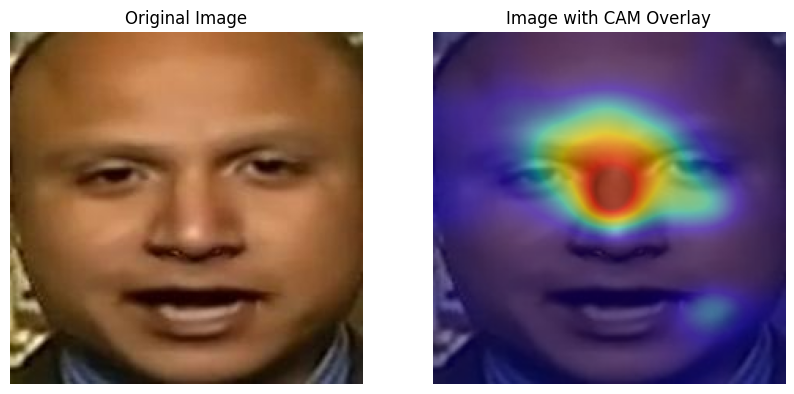

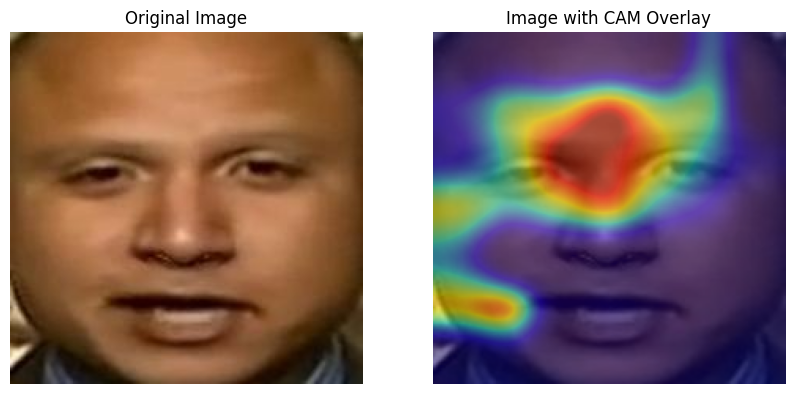

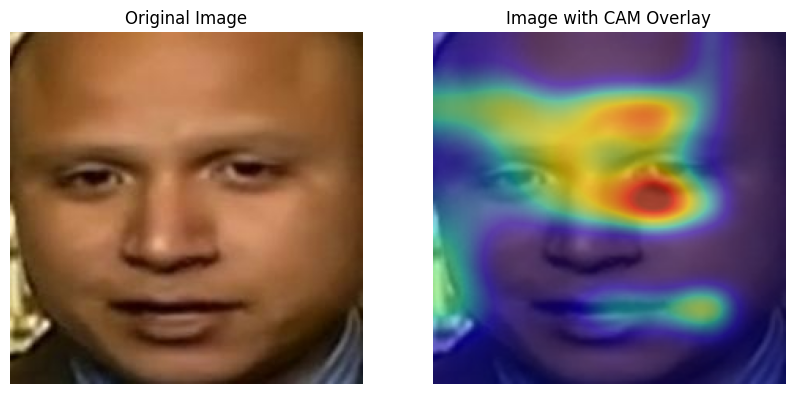

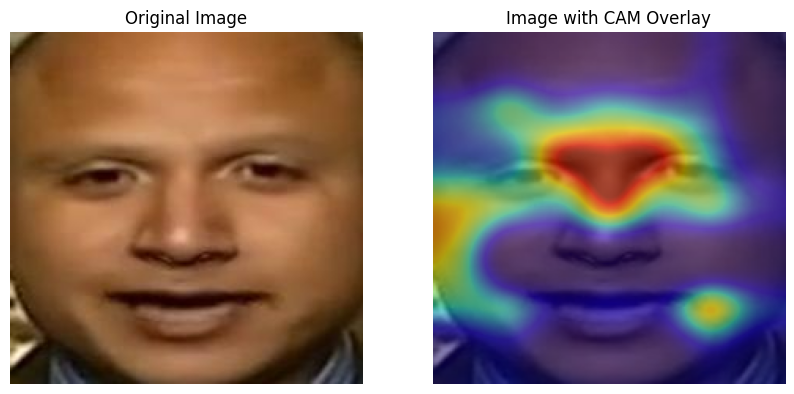

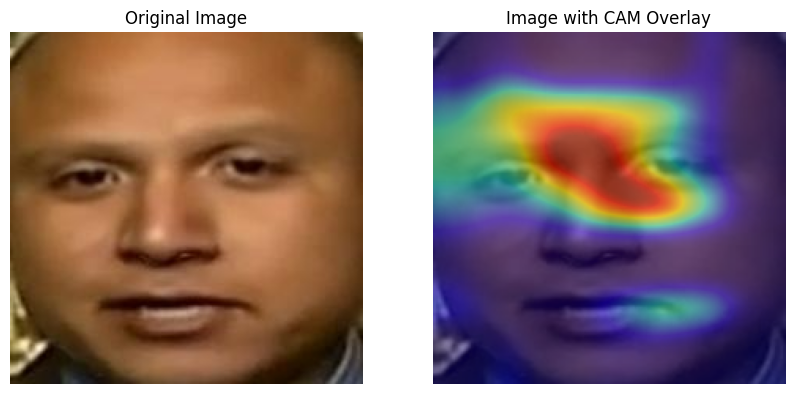

In [ ]:
import torch
import random
from torchvision import transforms
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
import matplotlib.pyplot as plt

# Load your trained model
model = torch.load('Resnet18_model.pth')
model.eval()

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Enable gradients for the target layer
target_layer = 'layer4'  # Specify the target layer for Grad-CAM
for param in getattr(model, target_layer).parameters():
    param.requires_grad = True

# Preprocessing function
preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Instantiate your CAM extractor
cam_extractor = GradCAM(model, target_layer)

# Randomly sample 5 images from the test_loader
random_indices = random.sample(range(len(test_loader.dataset)), 5)
random_images, random_labels = zip(*[(test_loader.dataset[i][0], test_loader.dataset[i][1]) for i in random_indices])

# Process and visualize each random image
for i, (image, label) in enumerate(zip(random_images, random_labels)):
    # Preprocess the image
    input_tensor = preprocess(image).to(device).unsqueeze(0)  # Add batch dimension

    # Calculate the CAM
    with torch.set_grad_enabled(True):
        out = model(input_tensor)
        activation_map = cam_extractor(out.squeeze().argmax().item(), out)

    # Check if the activation_map is a list and take the first element if so
    if isinstance(activation_map, list):
        activation_map = activation_map[0]

    # Move the activation map to CPU and convert to numpy
    activation_map_np = activation_map.squeeze().cpu().numpy()

    # Convert the activation map to PIL image
    activation_map_pil = transforms.ToPILImage()(activation_map_np)

    # Resize the CAM and overlay it
    result = overlay_mask(transforms.ToPILImage()(image), activation_map_pil, alpha=0.5)

    # Displaying the original image with CAM
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(transforms.ToPILImage()(image))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.title('Image with CAM Overlay')
    plt.axis('off')

    plt.show()

# Turn off gradients for the target layer
for param in getattr(model, target_layer).parameters():
    param.requires_grad = False
